In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#ĐỌC DỮ LIỆU

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/Shareddrives/NCKH (2023-2024)/Tập dữ liệu/Musical_Instruments_5.csv')
df.shape

(231392, 12)

In [3]:
df = df.drop(columns={'verified','unixReviewTime', 'style', 'image', 'vote'})

In [4]:
df

,overall,reviewTime,reviewerID,asin,reviewerName,reviewText,summary
0,5,2016-10-30,A3FO5AKVTFRCRJ,0739079891,francisco,It's good for beginners,Five Stars
1,5,2016-06-30,A3UCGC1DHFMBCE,0739079891,Eb Jack Murray,I recommend this starter Ukulele kit. I has e...,Five Stars
2,5,2016-05-09,A2S9SLRYLPGYZB,0739079891,Clara LaMarr,G'daughter received this for Christmas present...,Learning new songs to play regularly
3,4,2016-04-10,A15RTJWPG8OKOE,0739079891,Eagle80,"According to my order history, I bought this t...",A bargain-bin good-enough ukulele that's held ...
4,1,2016-02-06,A12ET1WO3OAVU7,0739079891,Amazon Customer,Please pay attention better than I did to the ...,Poor Quality product.
...,...,...,...,...,...,...,...
231387,5,2018-03-29,A2GLR2Q3M1PC7P,B01HIDOPP2,nic field,It's pretty great.,Five Stars
231388,5,2017-11-18,A3S1LSTRW57BP9,B01HIDOPP2,2gene,Good inexpensive wiring harness. It will do th...,Five Stars
231389,4,2017-06-05,A2BNWRRADDBSVO,B01HIDOPP2,Tim,Easily installed and worked as expected.,Four Stars
231390,1,2017-05-27,A1KRL5ZRON6DPT,B01HIDOPP2,Jude the Obscure,The description stated they were full size pot...,Not as described.


In [5]:
df.count()

overall         231392
reviewTime      231392
reviewerID      231392
asin            231392
reviewerName    231353
reviewText      231344
summary         231341
dtype: int64

In [6]:
df.describe()

,overall
count,231392.000000
mean,4.470448
std,0.981586
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#Xử lý dữ liệu null

In [7]:
df.isnull().sum()

overall          0
reviewTime       0
reviewerID       0
asin             0
reviewerName    39
reviewText      48
summary         51
dtype: int64

In [8]:
df = df.dropna(subset={'reviewerName', 'summary','reviewText'})
df.isnull().sum()

overall         0
reviewTime      0
reviewerID      0
asin            0
reviewerName    0
reviewText      0
summary         0
dtype: int64

#TIỀN XỬ LÝ DỮ LIỆU

In [9]:
import nltk
from keras.preprocessing.text import Tokenizer
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
from nltk.tokenize.toktok import ToktokTokenizer
from bs4 import BeautifulSoup
from nltk import pos_tag
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [10]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

#Removing Emails
def remove_Emails(text):
    pattern=r'\S+@\S+'
    text=re.sub(pattern,'',text)
    return text

#Removing URLS
def remove_URLS(text):
    pattern=r'http\S+'
    text=re.sub(pattern,'',text)
    return text

#Removing special characters and white characters and punctuations
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#LOWERCASE
def lowercase_text(text):
    return text.lower()


In [11]:
df['cleanedText']=df['reviewText'].apply(denoise_text)
df['cleanedText']=df['reviewText'].apply(remove_URLS)
df['cleanedText']=df['reviewText'].apply(remove_Emails)
df['cleanedText']=df['reviewText'].apply(remove_special_characters)
df['cleanedText']=df['reviewText'].apply(lowercase_text)

<ipython-input-10-13d2bd25a16c>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
<ipython-input-10-13d2bd25a16c>:3: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
<ipython-input-11-19367b49c404>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleanedText']=df['reviewText'].apply(denoise_text)
<ipython-input-11-19367b49c404>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [12]:
df

,overall,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,cleanedText
0,5,2016-10-30,A3FO5AKVTFRCRJ,0739079891,francisco,It's good for beginners,Five Stars,it's good for beginners
1,5,2016-06-30,A3UCGC1DHFMBCE,0739079891,Eb Jack Murray,I recommend this starter Ukulele kit. I has e...,Five Stars,i recommend this starter ukulele kit. i has e...
2,5,2016-05-09,A2S9SLRYLPGYZB,0739079891,Clara LaMarr,G'daughter received this for Christmas present...,Learning new songs to play regularly,g'daughter received this for christmas present...
3,4,2016-04-10,A15RTJWPG8OKOE,0739079891,Eagle80,"According to my order history, I bought this t...",A bargain-bin good-enough ukulele that's held ...,"according to my order history, i bought this t..."
4,1,2016-02-06,A12ET1WO3OAVU7,0739079891,Amazon Customer,Please pay attention better than I did to the ...,Poor Quality product.,please pay attention better than i did to the ...
...,...,...,...,...,...,...,...,...
231387,5,2018-03-29,A2GLR2Q3M1PC7P,B01HIDOPP2,nic field,It's pretty great.,Five Stars,it's pretty great.
231388,5,2017-11-18,A3S1LSTRW57BP9,B01HIDOPP2,2gene,Good inexpensive wiring harness. It will do th...,Five Stars,good inexpensive wiring harness. it will do th...
231389,4,2017-06-05,A2BNWRRADDBSVO,B01HIDOPP2,Tim,Easily installed and worked as expected.,Four Stars,easily installed and worked as expected.
231390,1,2017-05-27,A1KRL5ZRON6DPT,B01HIDOPP2,Jude the Obscure,The description stated they were full size pot...,Not as described.,the description stated they were full size pot...


In [13]:
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))
negative_words = \
    ["aint", "arent", "cannot", "cant", "couldnt", "darent", "didnt", "doesnt",
     "ain't", "aren't", "can't", "couldn't", "daren't", "didn't", "doesn't",
     "dont", "hadnt", "hasnt", "havent", "isnt", "mightnt", "mustnt", "neither",
     "don't", "hadn't", "hasn't", "haven't", "isn't", "mightn't", "mustn't",
     "neednt", "needn't", "never", "none", "nope", "nor", "not", "nothing", "nowhere",
     "oughtnt", "shant", "shouldnt", "uhuh", "wasnt", "werent",
     "oughtn't", "shan't", "shouldn't", "uh-uh", "wasn't", "weren't",
     "without", "wont", "wouldnt", "won't", "wouldn't", "rarely", "seldom", "despite","only"]
def remove_stopwords(text):
  if isinstance(text, str):
   return " ".join([w for w in text.split() if w not in STOPWORDS or w in negative_words])

df['cleanedText'] = df['cleanedText'].apply(lambda x: remove_stopwords(x))
df.head(50)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-13-3b1fce851881>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleanedText'] = df['cleanedText'].apply(lambda x: remove_stopwords(x))


,overall,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,cleanedText
0,5,2016-10-30,A3FO5AKVTFRCRJ,0739079891,francisco,It's good for beginners,Five Stars,good beginners
1,5,2016-06-30,A3UCGC1DHFMBCE,0739079891,Eb Jack Murray,I recommend this starter Ukulele kit. I has e...,Five Stars,recommend starter ukulele kit. everything need...
2,5,2016-05-09,A2S9SLRYLPGYZB,0739079891,Clara LaMarr,G'daughter received this for Christmas present...,Learning new songs to play regularly,g'daughter received christmas present last yea...
3,4,2016-04-10,A15RTJWPG8OKOE,0739079891,Eagle80,"According to my order history, I bought this t...",A bargain-bin good-enough ukulele that's held ...,"according order history, bought kit towards en..."
4,1,2016-02-06,A12ET1WO3OAVU7,0739079891,Amazon Customer,Please pay attention better than I did to the ...,Poor Quality product.,please pay attention better reviews! poor qual...
5,4,2016-01-02,A2WXECU99NYBAZ,0739079891,Minimesha,I purchased this as a gift for a friend who re...,Good Starter Kit,purchased gift friend really wanted learn. nea...
6,5,2015-06-21,A262B8XPOW9XAR,0739079891,Bruce Rodesney,"thanx, b",Five Stars,"thanx, b"
7,4,2015-03-28,A2MPUHYCHTNFAV,0739079891,Larry,Good cheap ukulele; got what I ordered.,Beginner quality,good cheap ukulele; got ordered.
8,5,2015-03-19,A38EESXGXN9YLB,0739079891,Francoise S Jayson,My grandson is very happy with his new uke!,Five Stars,grandson happy new uke!
9,3,2015-03-15,ABLTNLVKCVQMK,0739079891,Mark,Good basic guide.,Three Stars,good basic guide.


In [14]:
selected_columns = df[['reviewText', 'cleanedText']]
selected_columns

,reviewText,cleanedText
0,It's good for beginners,good beginners
1,I recommend this starter Ukulele kit. I has e...,recommend starter ukulele kit. everything need...
2,G'daughter received this for Christmas present...,g'daughter received christmas present last yea...
3,"According to my order history, I bought this t...","according order history, bought kit towards en..."
4,Please pay attention better than I did to the ...,please pay attention better reviews! poor qual...
...,...,...
231387,It's pretty great.,pretty great.
231388,Good inexpensive wiring harness. It will do th...,good inexpensive wiring harness. job.
231389,Easily installed and worked as expected.,easily installed worked expected.
231390,The description stated they were full size pot...,description stated full size pots. not. sent b...


## VISUALIZATION

In [15]:
import matplotlib.pyplot as plt

In [16]:
df.dtypes

overall          int64
reviewTime      object
reviewerID      object
asin            object
reviewerName    object
reviewText      object
summary         object
cleanedText     object
dtype: object

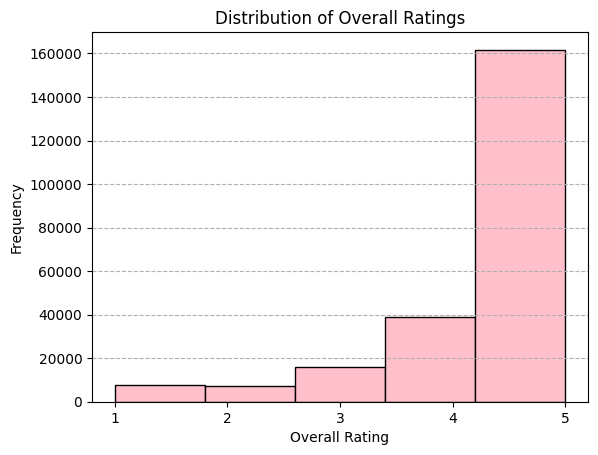

In [17]:
# Tạo histogram cho cột 'overall'
plt.hist(df['overall'], bins=5, color='pink', edgecolor='black')
plt.grid(axis='y', linestyle='--')  # Thêm đường lưới dọc


# Đặt tiêu đề và nhãn trục
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')

# Đặt các chỉ số nguyên trên trục x
plt.xticks(range(1, 6))

# Hiển thị biểu đồ
plt.show()

#TÍNH ĐIỂM CẢM XÚC BẰNG VADER

In [18]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [19]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix, classification_report
from nltk.util import ngrams

In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.util import ngrams

import nltk
nltk.download('vader_lexicon')

# # Định nghĩa hàm để tạo trigram từ văn bản
# def create_trigrams(text):
#     tokens = text.split()  # Chia văn bản thành các token
#     trigrams = [' '.join(gram) for gram in ngrams(tokens, 3)]  # Tạo trigrams từ tokens
#     return trigrams
# df['trigrams'] = df['clean_text'].apply(create_trigrams)



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [21]:
# Khởi tạo Vader Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Định nghĩa hàm tính điểm cảm xúc từ Vader cho một câu
def sentiment_scores(sentence):
    try:
        sentiment_dict = sia.polarity_scores(sentence)
        return sentiment_dict
    except TypeError:
        return 0  # Trả về 0 nếu có lỗi

In [22]:
df

,overall,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,cleanedText
0,5,2016-10-30,A3FO5AKVTFRCRJ,0739079891,francisco,It's good for beginners,Five Stars,good beginners
1,5,2016-06-30,A3UCGC1DHFMBCE,0739079891,Eb Jack Murray,I recommend this starter Ukulele kit. I has e...,Five Stars,recommend starter ukulele kit. everything need...
2,5,2016-05-09,A2S9SLRYLPGYZB,0739079891,Clara LaMarr,G'daughter received this for Christmas present...,Learning new songs to play regularly,g'daughter received christmas present last yea...
3,4,2016-04-10,A15RTJWPG8OKOE,0739079891,Eagle80,"According to my order history, I bought this t...",A bargain-bin good-enough ukulele that's held ...,"according order history, bought kit towards en..."
4,1,2016-02-06,A12ET1WO3OAVU7,0739079891,Amazon Customer,Please pay attention better than I did to the ...,Poor Quality product.,please pay attention better reviews! poor qual...
...,...,...,...,...,...,...,...,...
231387,5,2018-03-29,A2GLR2Q3M1PC7P,B01HIDOPP2,nic field,It's pretty great.,Five Stars,pretty great.
231388,5,2017-11-18,A3S1LSTRW57BP9,B01HIDOPP2,2gene,Good inexpensive wiring harness. It will do th...,Five Stars,good inexpensive wiring harness. job.
231389,4,2017-06-05,A2BNWRRADDBSVO,B01HIDOPP2,Tim,Easily installed and worked as expected.,Four Stars,easily installed worked expected.
231390,1,2017-05-27,A1KRL5ZRON6DPT,B01HIDOPP2,Jude the Obscure,The description stated they were full size pot...,Not as described.,description stated full size pots. not. sent b...


In [23]:
# df.reset_index(inplace=True)

In [24]:
df['vader_result'] = df['cleanedText'].apply(sentiment_scores)
df

<ipython-input-24-786afd53966a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vader_result'] = df['cleanedText'].apply(sentiment_scores)


,overall,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,cleanedText,vader_result
0,5,2016-10-30,A3FO5AKVTFRCRJ,0739079891,francisco,It's good for beginners,Five Stars,good beginners,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp..."
1,5,2016-06-30,A3UCGC1DHFMBCE,0739079891,Eb Jack Murray,I recommend this starter Ukulele kit. I has e...,Five Stars,recommend starter ukulele kit. everything need...,"{'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'comp..."
2,5,2016-05-09,A2S9SLRYLPGYZB,0739079891,Clara LaMarr,G'daughter received this for Christmas present...,Learning new songs to play regularly,g'daughter received christmas present last yea...,"{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'comp..."
3,4,2016-04-10,A15RTJWPG8OKOE,0739079891,Eagle80,"According to my order history, I bought this t...",A bargain-bin good-enough ukulele that's held ...,"according order history, bought kit towards en...","{'neg': 0.012, 'neu': 0.761, 'pos': 0.227, 'co..."
4,1,2016-02-06,A12ET1WO3OAVU7,0739079891,Amazon Customer,Please pay attention better than I did to the ...,Poor Quality product.,please pay attention better reviews! poor qual...,"{'neg': 0.148, 'neu': 0.451, 'pos': 0.401, 'co..."
...,...,...,...,...,...,...,...,...,...
231387,5,2018-03-29,A2GLR2Q3M1PC7P,B01HIDOPP2,nic field,It's pretty great.,Five Stars,pretty great.,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
231388,5,2017-11-18,A3S1LSTRW57BP9,B01HIDOPP2,2gene,Good inexpensive wiring harness. It will do th...,Five Stars,good inexpensive wiring harness. job.,"{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compou..."
231389,4,2017-06-05,A2BNWRRADDBSVO,B01HIDOPP2,Tim,Easily installed and worked as expected.,Four Stars,easily installed worked expected.,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp..."
231390,1,2017-05-27,A1KRL5ZRON6DPT,B01HIDOPP2,Jude the Obscure,The description stated they were full size pot...,Not as described.,description stated full size pots. not. sent b...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [25]:
df['compound'] = df['vader_result'].apply(lambda x: x['compound'])

<ipython-input-25-e21776c2d30d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['compound'] = df['vader_result'].apply(lambda x: x['compound'])


In [26]:
df

,overall,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,cleanedText,vader_result,compound
0,5,2016-10-30,A3FO5AKVTFRCRJ,0739079891,francisco,It's good for beginners,Five Stars,good beginners,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.4404
1,5,2016-06-30,A3UCGC1DHFMBCE,0739079891,Eb Jack Murray,I recommend this starter Ukulele kit. I has e...,Five Stars,recommend starter ukulele kit. everything need...,"{'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'comp...",0.3612
2,5,2016-05-09,A2S9SLRYLPGYZB,0739079891,Clara LaMarr,G'daughter received this for Christmas present...,Learning new songs to play regularly,g'daughter received christmas present last yea...,"{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'comp...",0.2500
3,4,2016-04-10,A15RTJWPG8OKOE,0739079891,Eagle80,"According to my order history, I bought this t...",A bargain-bin good-enough ukulele that's held ...,"according order history, bought kit towards en...","{'neg': 0.012, 'neu': 0.761, 'pos': 0.227, 'co...",0.9987
4,1,2016-02-06,A12ET1WO3OAVU7,0739079891,Amazon Customer,Please pay attention better than I did to the ...,Poor Quality product.,please pay attention better reviews! poor qual...,"{'neg': 0.148, 'neu': 0.451, 'pos': 0.401, 'co...",0.8922
...,...,...,...,...,...,...,...,...,...,...
231387,5,2018-03-29,A2GLR2Q3M1PC7P,B01HIDOPP2,nic field,It's pretty great.,Five Stars,pretty great.,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.8074
231388,5,2017-11-18,A3S1LSTRW57BP9,B01HIDOPP2,2gene,Good inexpensive wiring harness. It will do th...,Five Stars,good inexpensive wiring harness. job.,"{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compou...",0.4404
231389,4,2017-06-05,A2BNWRRADDBSVO,B01HIDOPP2,Tim,Easily installed and worked as expected.,Four Stars,easily installed worked expected.,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...",0.3400
231390,1,2017-05-27,A1KRL5ZRON6DPT,B01HIDOPP2,Jude the Obscure,The description stated they were full size pot...,Not as described.,description stated full size pots. not. sent b...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [27]:
#Visualization libraries
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns

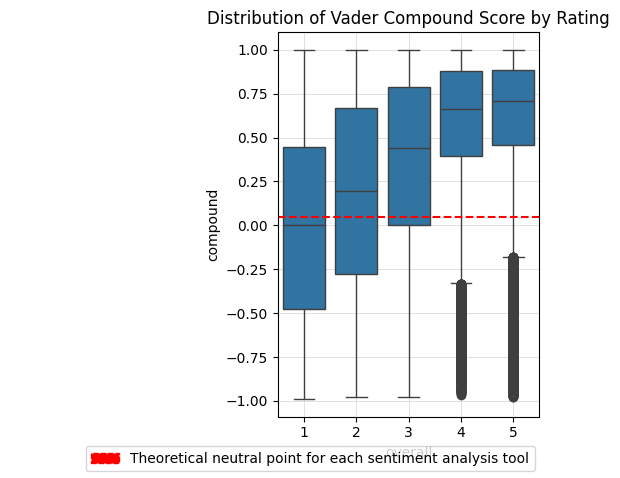

In [28]:
plt.subplot(1, 2, 2)
sns.boxplot(x=df['overall'], y=df['compound'])
plt.axhline(0.05, color='red', linestyle='--')  #adds horizontal line at y=0.05 for neutral point
plt.title('Distribution of Vader Compound Score by Rating')
plt.grid(True, color='lightgrey', linestyle='-', linewidth=0.5, which='both', zorder=0)

plt.subplots_adjust(bottom=0.2) #subplot layout adjusted to make space for the legend below

red_line = mpatches.Patch(color='red', linestyle='--', label='Theoretical neutral point for each sentiment analysis tool')

plt.figlegend(handles=[red_line], loc='lower center', ncol=1)

plt.tight_layout()
plt.show()

In [29]:
vader_medians = df.groupby(['overall'])['compound'].median()

print("\nVader Median Sentiment Scores by Rating:")
for overall, median in vader_medians.items():
    print(f"Rating {overall}: {median:.2f}")


Vader Median Sentiment Scores by Rating:
Rating 1: 0.00
Rating 2: 0.19
Rating 3: 0.44
Rating 4: 0.66
Rating 5: 0.71


In [30]:
#VADER INTO SENTIMENT
def find_sentiment_vader(compound_score):
    if -1 <= compound_score < -0.5:
      return 1
    if -0.5 <= compound_score < -0.05:
      return 2
    if -0.05 <= compound_score <= 0.05:
      return 3
    if 0.05 < compound_score <= 0.5:
      return 4
    return 5

df['vader_sentiment'] = df['compound'].apply(find_sentiment_vader)

<ipython-input-30-e378534e4389>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vader_sentiment'] = df['compound'].apply(find_sentiment_vader)


In [31]:
df.head(100)

,overall,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,cleanedText,vader_result,compound,vader_sentiment
0,5,2016-10-30,A3FO5AKVTFRCRJ,0739079891,francisco,It's good for beginners,Five Stars,good beginners,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.4404,4
1,5,2016-06-30,A3UCGC1DHFMBCE,0739079891,Eb Jack Murray,I recommend this starter Ukulele kit. I has e...,Five Stars,recommend starter ukulele kit. everything need...,"{'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'comp...",0.3612,4
2,5,2016-05-09,A2S9SLRYLPGYZB,0739079891,Clara LaMarr,G'daughter received this for Christmas present...,Learning new songs to play regularly,g'daughter received christmas present last yea...,"{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'comp...",0.2500,4
3,4,2016-04-10,A15RTJWPG8OKOE,0739079891,Eagle80,"According to my order history, I bought this t...",A bargain-bin good-enough ukulele that's held ...,"according order history, bought kit towards en...","{'neg': 0.012, 'neu': 0.761, 'pos': 0.227, 'co...",0.9987,5
4,1,2016-02-06,A12ET1WO3OAVU7,0739079891,Amazon Customer,Please pay attention better than I did to the ...,Poor Quality product.,please pay attention better reviews! poor qual...,"{'neg': 0.148, 'neu': 0.451, 'pos': 0.401, 'co...",0.8922,5
...,...,...,...,...,...,...,...,...,...,...,...
95,4,2012-07-12,A211A51H4XNPUF,B00001W0DH,headphones guy,Really good set of cans...very good overall......,Another Sony hall of famer gone....,really good set cans...very good overall...all...,"{'neg': 0.0, 'neu': 0.6, 'pos': 0.4, 'compound...",0.9402,5
96,4,2012-05-12,A3N0P5AAMP6XD2,B00001W0DH,H B,I bought this item nearly 10 years ago in a su...,Good but costly,bought item nearly 10 years ago supermarket 37...,"{'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'comp...",0.9860,5
97,5,2011-09-28,A1DVKQE6BFL98Q,B00001W0DH,Adam,I have been beating these around for 9 years n...,Stood the test of time!,beating around 9 years great day bought them. ...,"{'neg': 0.096, 'neu': 0.482, 'pos': 0.421, 'co...",0.8779,5
98,5,2011-01-27,A2H629SI5VJGRM,B00001W0DH,Robert Mitchell,"I will keep it simple folks! I bought them, I ...",Nice Headphones!,"keep simple folks! bought them, tried them, lo...","{'neg': 0.0, 'neu': 0.627, 'pos': 0.373, 'comp...",0.9588,5


In [32]:
df.describe()

,overall,compound,vader_sentiment
count,231255.000000,231255.000000,231255.000000
mean,4.470308,0.563983,4.410140
std,0.981714,0.402113,1.005869
min,1.000000,-0.990600,1.000000
25%,4.000000,0.421500,4.000000
50%,5.000000,0.663200,5.000000
75%,5.000000,0.874700,5.000000
max,5.000000,0.999900,5.000000


In [33]:
# df_vader.describe()

(array([  6085.,      0.,  11405.,      0.,      0.,  18290.,      0.,
         41273.,      0., 154202.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

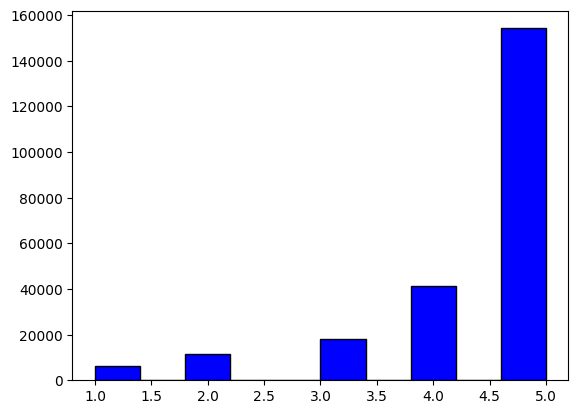

In [34]:
plt.hist(df['vader_sentiment'], bins=10, color='blue', edgecolor='black')

In [35]:
df.reset_index(inplace=True)

In [36]:
check_data = []
for i in range(0, len(df)):
    if (df['overall'][i] > 3) and (df['overall'][i] != df['vader_sentiment'][i]) :
        check_data.append({
            'cleanedText': df['cleanedText'][i],
            'overall': df['overall'][i],
            'new_overall': df['vader_sentiment'][i],
            'vader_result': df['vader_result'][i]
        })
check_df = pd.DataFrame(check_data)
check_df.head(50)

,cleanedText,overall,new_overall,vader_result
0,good beginners,5,4,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp..."
1,recommend starter ukulele kit. everything need...,5,4,"{'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'comp..."
2,g'daughter received christmas present last yea...,5,4,"{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'comp..."
3,"according order history, bought kit towards en...",4,5,"{'neg': 0.012, 'neu': 0.761, 'pos': 0.227, 'co..."
4,purchased gift friend really wanted learn. nea...,4,5,"{'neg': 0.081, 'neu': 0.461, 'pos': 0.458, 'co..."
5,"thanx, b",5,3,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
6,good,5,4,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
7,haven't open yet. cannot wait see son's face c...,5,3,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
8,great inexpensive starter kit see get ukelele ...,4,5,"{'neg': 0.0, 'neu': 0.621, 'pos': 0.379, 'comp..."
9,"cute little instrument, daughter loves sound g...",4,5,"{'neg': 0.094, 'neu': 0.498, 'pos': 0.408, 'co..."


In [37]:
print(check_df.shape)

(73471, 4)


In [38]:
check_df.head(50)

,cleanedText,overall,new_overall,vader_result
0,good beginners,5,4,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp..."
1,recommend starter ukulele kit. everything need...,5,4,"{'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'comp..."
2,g'daughter received christmas present last yea...,5,4,"{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'comp..."
3,"according order history, bought kit towards en...",4,5,"{'neg': 0.012, 'neu': 0.761, 'pos': 0.227, 'co..."
4,purchased gift friend really wanted learn. nea...,4,5,"{'neg': 0.081, 'neu': 0.461, 'pos': 0.458, 'co..."
5,"thanx, b",5,3,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
6,good,5,4,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
7,haven't open yet. cannot wait see son's face c...,5,3,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
8,great inexpensive starter kit see get ukelele ...,4,5,"{'neg': 0.0, 'neu': 0.621, 'pos': 0.379, 'comp..."
9,"cute little instrument, daughter loves sound g...",4,5,"{'neg': 0.094, 'neu': 0.498, 'pos': 0.408, 'co..."


In [39]:
equal_data = []
for i in range(0, len(df)):
    if (df['overall'][i] >= 3) and (df['overall'][i] == df['vader_sentiment'][i]) :
        equal_data.append({
            'clean_text': df['cleanedText'][i],
            'overall': df['overall'][i],
            'vader_sentiment': df['vader_sentiment'][i],
            'vader_result': df['vader_result'][i]
        })
equal_df = pd.DataFrame(equal_data)
equal_df.head(100)

,clean_text,overall,vader_sentiment,vader_result
0,good cheap ukulele; got ordered.,4,4,"{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compou..."
1,grandson happy new uke!,5,5,"{'neg': 0.0, 'neu': 0.429, 'pos': 0.571, 'comp..."
2,good starter set,4,4,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp..."
3,enjoying ukulele. one long time ago. came good...,5,5,"{'neg': 0.0, 'neu': 0.539, 'pos': 0.461, 'comp..."
4,14 yr. old daughter already ukelele bought ama...,5,5,"{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'comp..."
...,...,...,...,...
95,perfect.,5,5,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
96,"pay, great pedal. (got discount prime) expecti...",5,5,"{'neg': 0.037, 'neu': 0.613, 'pos': 0.349, 'co..."
97,love feel. perfect. highly recommend.,5,5,"{'neg': 0.0, 'neu': 0.158, 'pos': 0.842, 'comp..."
98,perfect!,5,5,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."


In [40]:
equal_df.shape

(128803, 4)

In [41]:
equal_df.head(100)

,clean_text,overall,vader_sentiment,vader_result
0,good cheap ukulele; got ordered.,4,4,"{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compou..."
1,grandson happy new uke!,5,5,"{'neg': 0.0, 'neu': 0.429, 'pos': 0.571, 'comp..."
2,good starter set,4,4,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp..."
3,enjoying ukulele. one long time ago. came good...,5,5,"{'neg': 0.0, 'neu': 0.539, 'pos': 0.461, 'comp..."
4,14 yr. old daughter already ukelele bought ama...,5,5,"{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'comp..."
...,...,...,...,...
95,perfect.,5,5,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
96,"pay, great pedal. (got discount prime) expecti...",5,5,"{'neg': 0.037, 'neu': 0.613, 'pos': 0.349, 'co..."
97,love feel. perfect. highly recommend.,5,5,"{'neg': 0.0, 'neu': 0.158, 'pos': 0.842, 'comp..."
98,perfect!,5,5,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."


In [42]:
def compare_sentiments(row):
    return {
        'vader_match': row['vader_sentiment'] == row['overall']
    }

comparison_df = pd.DataFrame([compare_sentiments(row) for _, row in df.iterrows()])
results = {
        'Vader': {
        'matches': comparison_df['vader_match'].sum(),
        'not_matches': (~comparison_df['vader_match']).sum(),
        'accuracy': comparison_df['vader_match'].mean() * 100
    }}
for analyzer, stats in results.items():
    print(f"{analyzer} Accuracy: {stats['accuracy']:.2f}%")
    print(f"{analyzer} Total matches: {stats['matches']}")
    print(f"{analyzer} Total not matches: {stats['not_matches']}")


Vader Accuracy: 57.07%
Vader Total matches: 131978
Vader Total not matches: 99277
